In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

def get_sp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    table = pd.read_html(url, header=0)[0]
    return table['Symbol'].tolist()

sp500_tickers = get_sp500_tickers()

# Due to the large number of tickers, it might be beneficial to fetch data in smaller batches
data = yf.download(sp500_tickers, start="2023-01-01", end="2023-10-01", group_by="ticker")


[*********************100%%**********************]  503 of 503 completed


3 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-10-01)')
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1672549200, endDate = 1696132800")


                  HRL                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2023-01-03  45.500000  45.950001  45.340000  45.750000  44.478130  1546900   
2023-01-04  45.830002  46.180000  45.580002  45.889999  44.614235  1654500   
2023-01-05  45.930000  46.119999  45.560001  46.049999  44.769787  1640100   
2023-01-06  46.410000  47.029999  46.410000  46.910000  45.605881  1348200   
2023-01-09  46.779999  46.900002  46.040001  46.090000  44.808674  2395400   
...               ...        ...        ...        ...        ...      ...   
2023-09-25  38.759998  39.099998  38.639999  38.930000  38.602306  1674900   
2023-09-26  38.919998  39.250000  38.820000  38.849998  38.522980  1996400   
2023-09-27  38.820000  38.950001  38.090000  38.330002  38.007359  1626000   
2023-09-28  38.430000  38.560001  38.009998  38.029999  37.70988

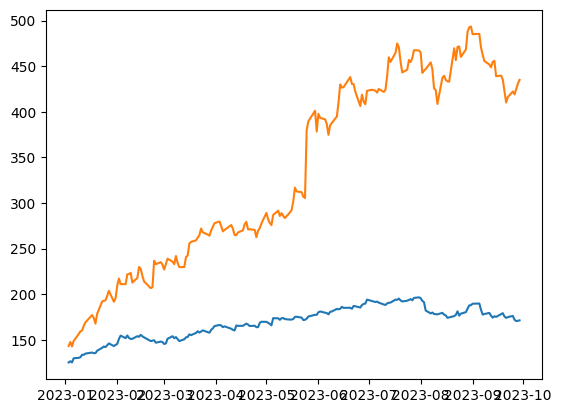

In [3]:
print(data)
plt.plot(data.index, data.AAPL.Close, label= 'appl')
plt.plot(data.index, data.NVDA.Close, label = 'nvidia')

In [24]:
df = pd.concat([data['AAPL']['Close'], data['NVDA']['Close']], axis=1)
df.columns = ['aapl', 'nvda']
df.head()

,aapl,nvda
Date,,
2023-01-03 00:00:00,125.070000,143.149994
2023-01-04 00:00:00,126.360001,147.490005
2023-01-05 00:00:00,125.019997,142.649994
2023-01-06 00:00:00,129.619995,148.589996
2023-01-09 00:00:00,130.149994,156.279999


In [33]:
import statsmodels.api as sm
model = sm.OLS(df.nvda, df.aapl).fit()
model.summary()
beta = model.params[0]

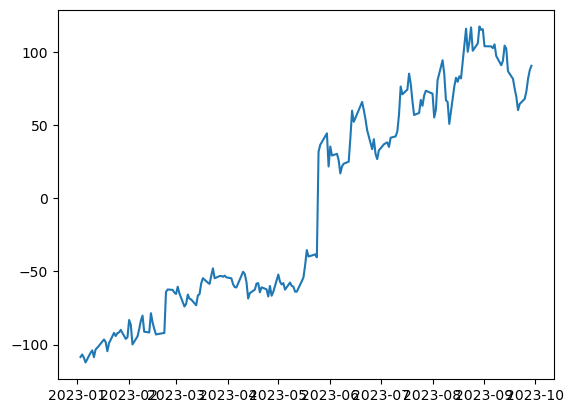

In [34]:
plt.plot(df.index, df.nvda - beta * df.aapl)

In [35]:
from statsmodels.tsa.stattools import coint

coint(df.aapl, df.nvda)

(-2.2516094450907147,
 0.3979311197090724,
 array([-3.95629028, -3.36917722, -3.06733077]))

In [17]:
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

KeyError: 'Adj Close'